Nama kolom dalam data: Index(['NO', 'KODE', 'TANGGAL', 'NOMOR DAN TANGGAL', 'SIFAT SURAT',
       'ISI RINGKAS', 'DARI', 'KEPADA', 'PENGOLAH', 'KET', 'Bulan', 'Kode',
       'Column2'],
      dtype='object')
Kolom berikut tidak ditemukan dalam data: ['JENIS', 'ISI RINGKASAN']
        NO TANGGAL  KET  Bulan  Column2
count  0.0       0  0.0    0.0      0.0
mean   NaN     NaT  NaN    NaN      NaN
min    NaN     NaT  NaN    NaN      NaN
25%    NaN     NaT  NaN    NaN      NaN
50%    NaN     NaT  NaN    NaN      NaN
75%    NaN     NaT  NaN    NaN      NaN
max    NaN     NaT  NaN    NaN      NaN
std    NaN     NaN  NaN    NaN      NaN
Jumlah surat masuk per bulan:
Series([], dtype: int64)
Persentase Kenaikan/Berkurang Tiap Bulan:
 Series([], dtype: float64)


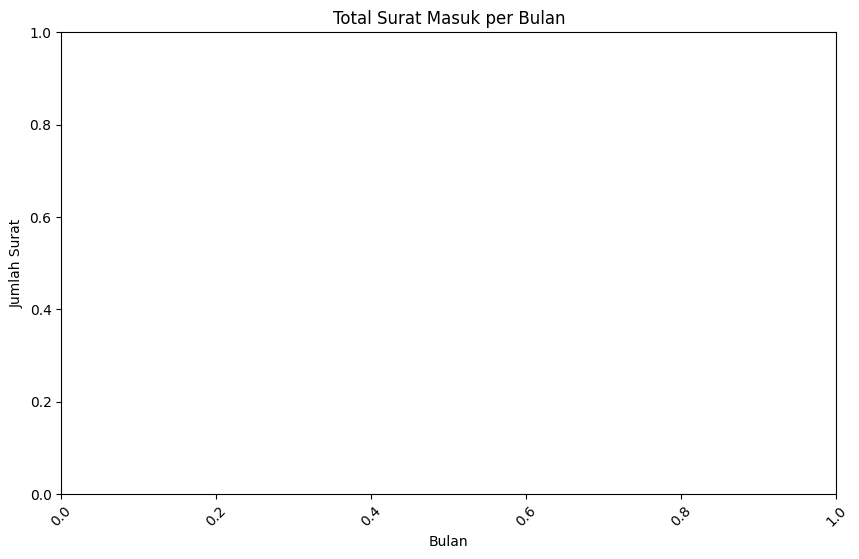

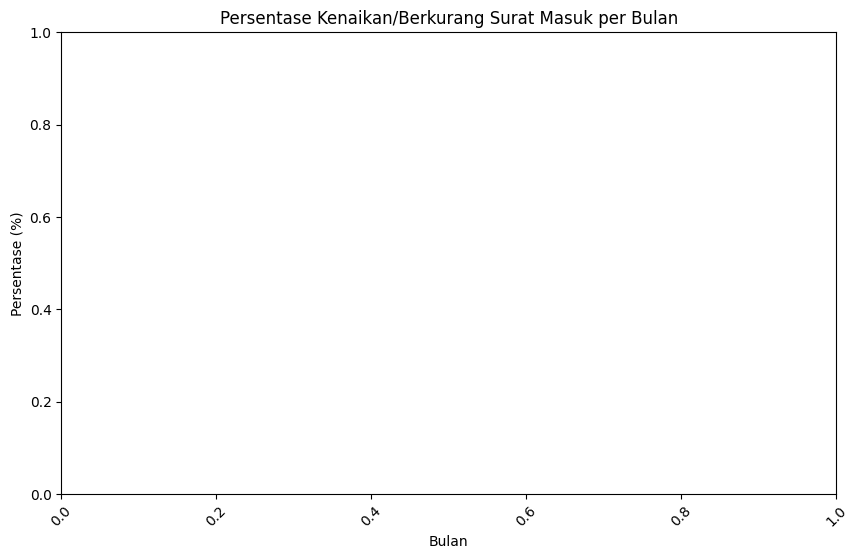

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path folder tempat file Excel disimpan
folder_path = './.Data/'

# Daftar file dengan keterkaitan bulan
file_month_map = {
    "januari.xlsx": 1,
    "februari.xlsx": 2,
    "maret.xlsx": 3,
    "april.xlsx": 4,
    "mei.xlsx": 5,
    "juni.xlsx": 6,
    "juli.xlsx": 7,
    "agustus.xlsx": 8,
    "september.xlsx": 9
}

data_frames = []

# Memuat file Excel sesuai bulan
for file_name, month in file_month_map.items():
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):  # Periksa apakah file ada
        df = pd.read_excel(file_path)
        df['file_month_map'] = Bulan  # Menambahkan kolom bulan berdasarkan file
        data_frames.append(df)
    else:
        print(f"File {file_name} tidak ditemukan.")

# Menggabungkan semua DataFrame menjadi satu
if data_frames:
    data = pd.concat(data_frames, ignore_index=True)
else:
    print("Tidak ada file yang ditemukan.")
    data = pd.DataFrame()  # Menghindari error jika tidak ada data

# Menampilkan nama kolom dalam data
print("Nama kolom dalam data:", data.columns)

# Kolom yang diharapkan dalam data
required_columns = ["NO", "KODE", "TANGGAL", "JENIS", "SIFAT SURAT", "ISI RINGKASAN", "DARI", "KEPADA", "PENGOLAH", "KET", "Bulan"]

# Cek keberadaan kolom dalam data
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam data: {missing_columns}")

# 1. Pembersihan Data
# Menghapus duplikat
data = data.drop_duplicates()

# Menghapus baris dengan nilai kosong di kolom penting
data = data.dropna(subset=[col for col in required_columns if col in data.columns])

# Mengubah format kolom tanggal (jika tersedia)
if "TANGGAL" in data.columns:
    data["TANGGAL"] = pd.to_datetime(data["TANGGAL"], errors='coerce')

# 2. Analisis Deskriptif
# Statistik dasar
print(data.describe())

# Total surat masuk per bulan
if 'Bulan' in data.columns:
    jumlah_per_bulan = data.groupby('Bulan').size()
    print("Jumlah surat masuk per bulan:")
    print(jumlah_per_bulan)

    # Menghitung persentase perubahan tiap bulan
    persentase_kenaikan = jumlah_per_bulan.pct_change() * 100
    print("Persentase Kenaikan/Berkurang Tiap Bulan:\n", persentase_kenaikan)

# 3. Visualisasi Data
# Total surat masuk per bulan
if 'Bulan' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=jumlah_per_bulan.index, y=jumlah_per_bulan.values)
    plt.title("Total Surat Masuk per Bulan")
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Surat")
    plt.xticks(rotation=45)
    plt.show()

    # Grafik persentase kenaikan/penurunan jumlah surat
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=persentase_kenaikan.index, y=persentase_kenaikan.values, marker="o")
    plt.title("Persentase Kenaikan/Berkurang Surat Masuk per Bulan")
    plt.xlabel("Bulan")
    plt.ylabel("Persentase (%)")
    plt.xticks(rotation=45)
    plt.show()
